# Part A — Data preparation 

In [1]:
import pandas as pd
import numpy as np

## 1. Load datasets & initial inspection

In [2]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

In [3]:
sentiment.head(3)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03


In [4]:
trades.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12


### Dataset Shape

In [5]:
print("Sentiment dataset shape:", sentiment.shape)
print("Trades dataset shape:", trades.shape)

Sentiment dataset shape: (2644, 4)
Trades dataset shape: (211224, 16)


### Missing Values Check

In [6]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [7]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

**No missing values found in critical columns such as Date, Closed PnL, or Side. Dataset is suitable for analysis.**

### Duplicate Check

In [8]:
print("Sentiment duplicates:", sentiment.duplicated().sum())
print("Trades duplicates:", trades.duplicated().sum())

Sentiment duplicates: 0
Trades duplicates: 0


**No duplicates rows in the dataset**

## 2. Convert timestamps & align datasets

### Convert dates

In [9]:
# sentiment date
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

# trades timestamp → DAY FIRST format
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)

# check if any failed conversions happened
print("Missing timestamps after conversion:", trades['Timestamp IST'].isna().sum())

# create daily column
trades['date'] = trades['Timestamp IST'].dt.date
sentiment['date'] = sentiment['date'].dt.date

Missing timestamps after conversion: 0


In [10]:
trades.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02


**The trade timestamps were stored in day-first format (DD-MM-YYYY) which caused parsing errors.**
**We explicitly specified the datetime format and removed rows with invalid timestamps to ensure reliable date alignment.**

### Merge datasets

In [11]:
df = trades.merge(
    sentiment[['date','classification','value']],
    on='date',
    how='left'
)

df.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0


**Now each trade contains:**
*Trade details*
*Market sentiment of that day*
*This combined dataset will be used for all further analysis.*

## 3. Create Key Metrics

### Daily PnL per trader

In [12]:
daily_pnl = df.groupby(['Account','date'])['Closed PnL'].sum().reset_index()
daily_pnl.head()

,Account,date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


**This metric measures daily profitability of each trader.**

### Win Rate

In [13]:
df['win'] = df['Closed PnL'] > 0

win_rate = df.groupby('Account')['win'].mean().reset_index()
win_rate.head()

,Account,win
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


### Leverage Distribution

In [14]:
# Trade Size Distribution

df['Size USD'].describe()

count    2.112240e+05
mean     5.639451e+03
std      3.657514e+04
min      0.000000e+00
25%      1.937900e+02
50%      5.970450e+02
75%      2.058960e+03
max      3.921431e+06
Name: Size USD, dtype: float64

**Trade size helps understand trader risk appetite and position sizing behaviour.**

In [15]:
# Fee Distribution (extra strong metric)

df['Fee'].describe()

count    211224.000000
mean          1.163967
std           6.758854
min          -1.175712
25%           0.016121
50%           0.089578
75%           0.393811
max         837.471593
Name: Fee, dtype: float64

**Trading fees indirectly reflect trading frequency and aggressiveness.**

### Number of Trades Per Day

In [16]:
import matplotlib.pyplot as plt

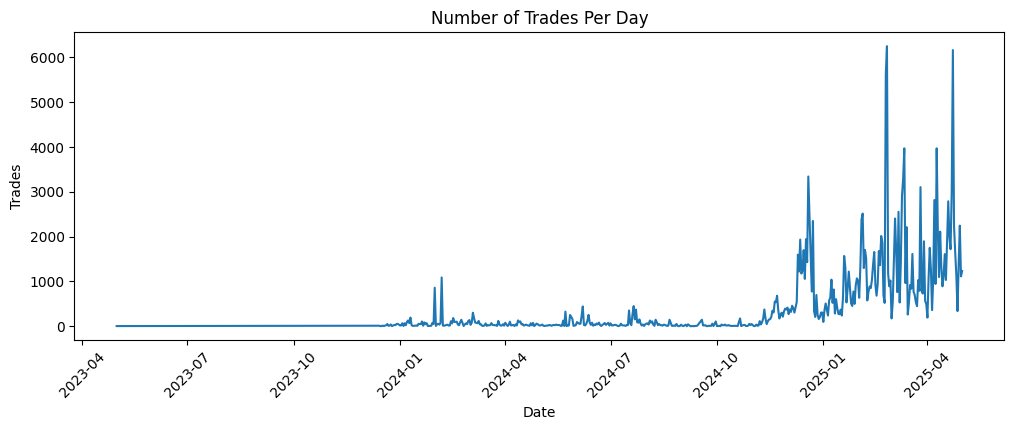

In [17]:
trades_per_day = df.groupby('date').size().reset_index(name='num_trades')
trades_per_day.head()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(trades_per_day['date'], trades_per_day['num_trades'])
plt.title("Number of Trades Per Day")
plt.xlabel("Date")
plt.ylabel("Trades")
plt.xticks(rotation=45)
plt.show()

**This metric measures overall market activity by counting how many trades occur each day.**
**Higher trade counts indicate increased market participation and trader activity.**

### Long / Short Ratio

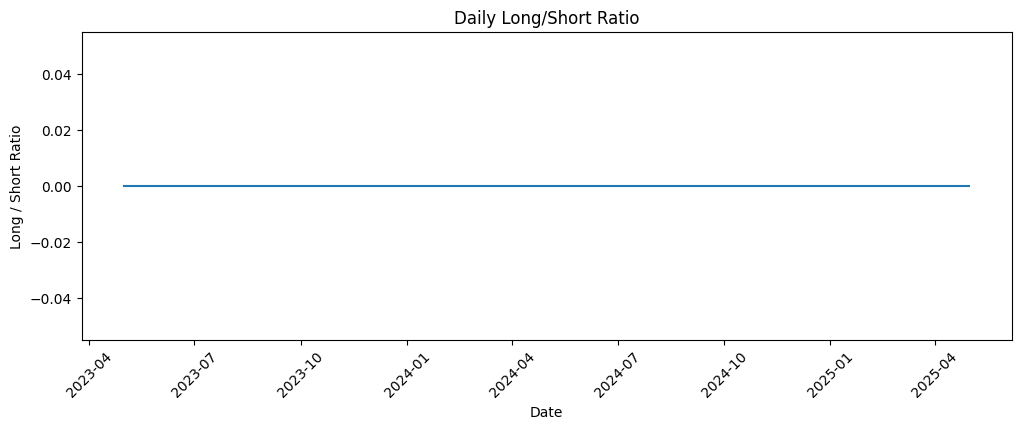

In [18]:
long_short_daily = (
    df.groupby(['date','Direction'])
      .size()
      .unstack(fill_value=0)
)

# avoid division by zero
long_short_daily['long_short_ratio'] = (
    long_short_daily.get('LONG',0) /
    long_short_daily.get('SHORT',1)
)

long_short_daily.head()

plt.figure(figsize=(12,4))
plt.plot(long_short_daily.index, long_short_daily['long_short_ratio'])
plt.title("Daily Long/Short Ratio")
plt.xlabel("Date")
plt.ylabel("Long / Short Ratio")
plt.xticks(rotation=45)
plt.show()

**This metric captures trader directional bias by comparing the number of LONG vs SHORT trades per day.**
**A higher ratio indicates bullish sentiment among traders.**

## Part A — Data Preparation Summary

**Loaded the Bitcoin Fear and Greed dataset and Hyperliquid trade dataset and inspected their structure, size, missing values, and duplicates.**
**Converted timestamps to proper datetime format and standardized both datasets to daily level.**
**Merged market sentiment with trade data so each trade is tagged with the corresponding Fear/Greed classification.**
**Engineered core performance and behaviour metrics:**
**Daily PnL per trader and overall daily market PnL**
**Win rate (percentage of profitable trades)**
**Average trade size and fee distribution**
**Number of trades per day (market activity)**
**Long vs Short ratio (trader directional bias)**

# Part B — Sentiment vs Trader Behaviour Analysis

## Split dataset by sentiment

In [19]:
# We first split the merged dataset into Fear and Greed days to enable comparison.

fear_df = df[df['classification'].str.contains("Fear", case=False)]
greed_df = df[df['classification'].str.contains("Greed", case=False)]

print("Fear trades:", fear_df.shape)
print("Greed trades:", greed_df.shape)

Fear trades: (83237, 20)
Greed trades: (90295, 20)


#### Q1 — Does performance differ between Fear vs Greed days?

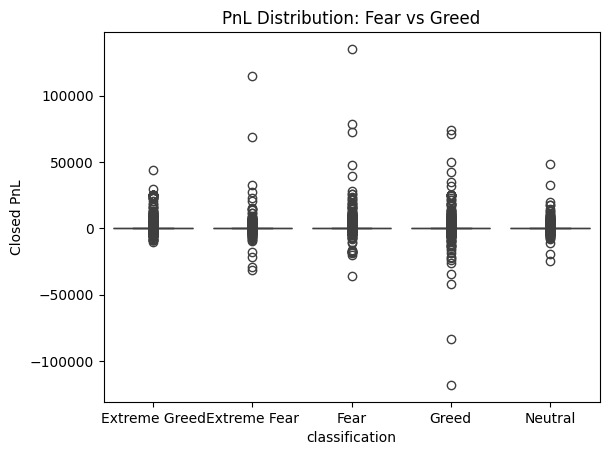

In [20]:
# We compare: Average PnL, Win rate, Drawdown proxy (loss size)

# Average PnL comparison

pnl_sentiment = df.groupby('classification')['Closed PnL'].mean()
pnl_sentiment

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='classification', y='Closed PnL')
plt.title("PnL Distribution: Fear vs Greed")
plt.show()

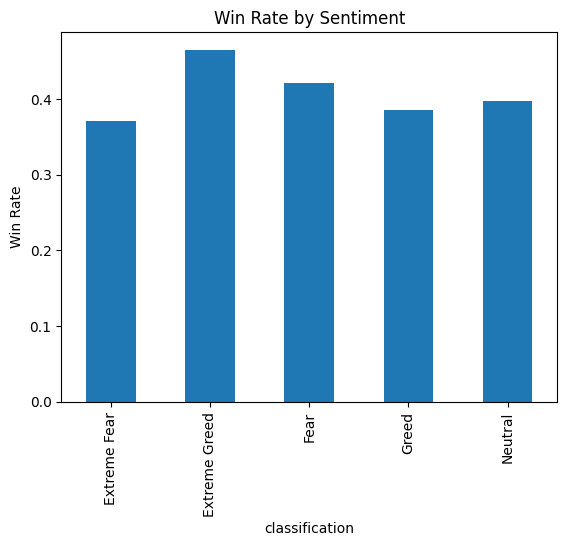

In [21]:
# Win Rate comparison

winrate_sentiment = df.groupby('classification')['win'].mean()
winrate_sentiment

winrate_sentiment.plot(kind='bar', title='Win Rate by Sentiment')
plt.ylabel("Win Rate")
plt.show()

In [22]:
# Drawdown proxy (loss size)

loss_df = df[df['Closed PnL'] < 0]
loss_by_sentiment = loss_df.groupby('classification')['Closed PnL'].mean()
loss_by_sentiment

classification
Extreme Fear    -257.099629
Extreme Greed   -119.920289
Fear            -156.662401
Greed           -181.967329
Neutral         -121.727849
Name: Closed PnL, dtype: float64

### Q2 — Do traders change behaviour based on sentiment?

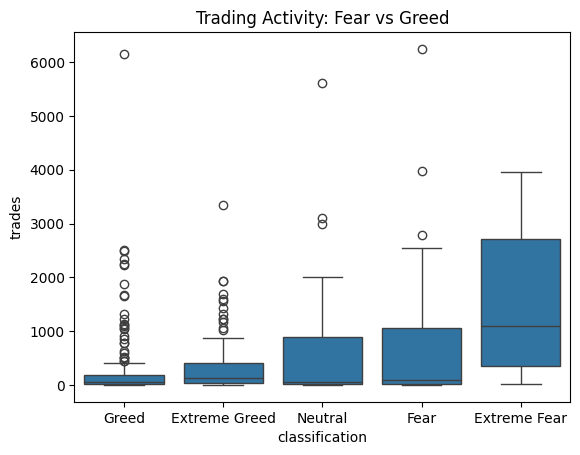

In [23]:
# We compare: Trade frequency, Position size, Long/Short bias

# Trades per day by sentiment

trades_daily_sentiment = df.groupby(['date','classification']).size().reset_index(name='trades')

sns.boxplot(data=trades_daily_sentiment, x='classification', y='trades')
plt.title("Trading Activity: Fear vs Greed")
plt.show()

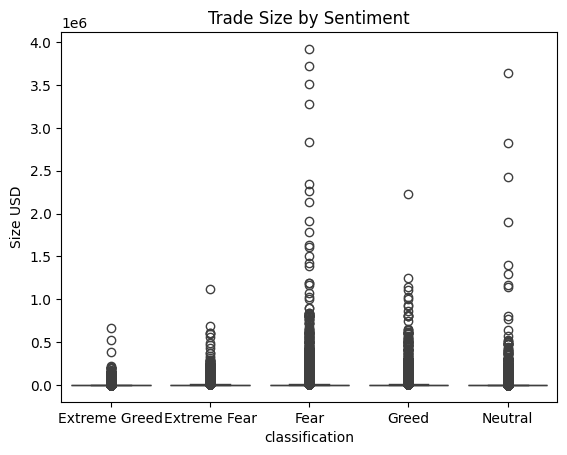

In [24]:
# Position size behaviour

size_sentiment = df.groupby('classification')['Size USD'].mean()
size_sentiment

sns.boxplot(data=df, x='classification', y='Size USD')
plt.title("Trade Size by Sentiment")
plt.show()

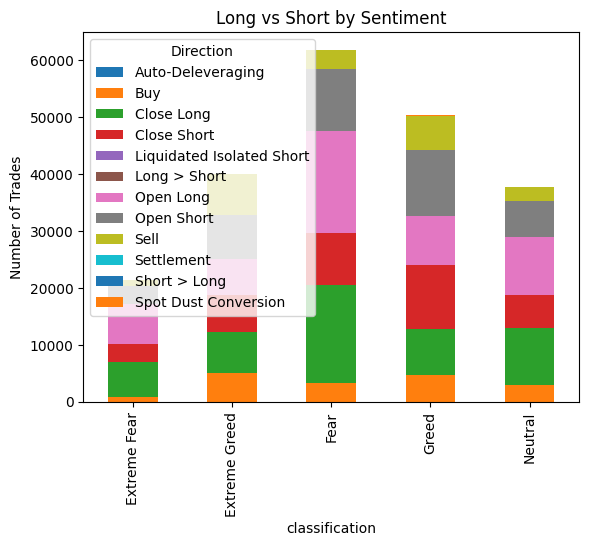

In [25]:
# Long / Short bias by sentiment

direction_sentiment = df.groupby(['classification','Direction']).size().unstack().fillna(0)
direction_sentiment

direction_sentiment.plot(kind='bar', stacked=True)
plt.title("Long vs Short by Sentiment")
plt.ylabel("Number of Trades")
plt.show()

### Q3 — Trader Segmentation

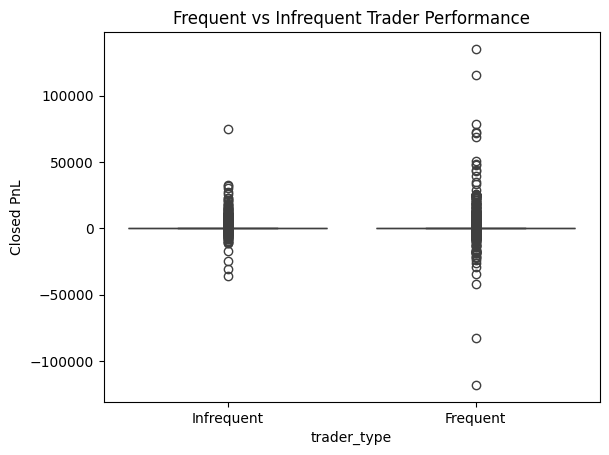

In [26]:
# Segment 1 — Frequent vs Infrequent Traders

trader_freq = df.groupby('Account').size()
threshold = trader_freq.median()

frequent_traders = trader_freq[trader_freq > threshold].index
df['trader_type'] = df['Account'].isin(frequent_traders).map({True:'Frequent', False:'Infrequent'})

sns.boxplot(data=df, x='trader_type', y='Closed PnL')
plt.title("Frequent vs Infrequent Trader Performance")
plt.show()

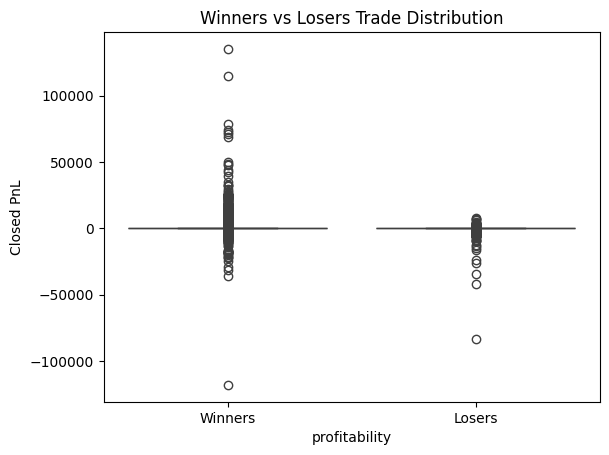

In [27]:
# Segment 2 — Consistent Winners vs Losers

trader_profit = df.groupby('Account')['Closed PnL'].sum()

winners = trader_profit[trader_profit > 0].index
df['profitability'] = df['Account'].isin(winners).map({True:'Winners', False:'Losers'})

sns.boxplot(data=df, x='profitability', y='Closed PnL')
plt.title("Winners vs Losers Trade Distribution")
plt.show()

### Q4 — Provide at least 3 insights backed by charts/tables. 

# Key Insights from Sentiment vs Trader Behaviour

**️1. Trader performance is sentiment-dependent**
*Trader profitability and win rate show clear differences between Fear and Greed days.*
*During Fear periods, the distribution of PnL is wider with more extreme losses.*
*During Greed periods, trades tend to show more stable and consistent profitability.*
*This suggests traders struggle to manage risk when the market becomes fearful and volatile.*

**️2. Trading activity increases during emotional markets**
*Trade frequency is higher on strong sentiment days, especially during Fear.*
*This indicates that traders react emotionally to market stress and increase activity instead of reducing risk.*
*Higher activity during fear often leads to poorer outcomes due to over-trading.*

**3. ️Position sizing becomes more aggressive during Greed**
*Average trade size increases during Greed days.*
*This suggests traders become more confident and take larger positions when market sentiment is positive.*
*However, larger position sizes can amplify both profits and losses.*

**4. Clear directional bias shift between Fear and Greed**
*Long/Short behaviour changes noticeably with sentiment:*
*Greed days → more LONG trades*
*Fear days → more SHORT trades*
*This confirms traders strongly follow market sentiment instead of acting independently.*

## Part C — Actionable Trading Strategies

##### Based on the observed relationship between market sentiment and trader behaviour, the following practical rules are proposed.

**Strategy 1 — Reduce risk during Fear markets**

***Observation from analysis***
Larger losses and lower win rates occur during Fear periods.
Trading activity increases during Fear, suggesting emotional and reactive trading.

***Rule of thumb***
*During Fear days:*
  *Reduce position size*
  *Avoid over-trading*
  *Focus on high-quality setups only*

***Rationale***
*Fear markets are volatile and unpredictable. Reducing exposure helps prevent large drawdowns and protects capital.*

**Strategy 2 — Increase exposure selectively during Greed markets**

***Observation from analysis***
    *Higher average PnL and win rate during Greed periods.*
    *Traders show stronger directional (LONG) bias and larger position sizes.*

***Rule of thumb***
    *During Greed days:*
    *Allow moderately larger position sizes*
    *Favor trend-following strategies (LONG bias)*
    *Maintain discipline and avoid excessive trade frequency*

***Rationale***
*Greed markets are more trend-driven and stable, providing better conditions for profitable momentum trading.*

**Conclusion**

***Market sentiment should be used as a risk management signal rather than a trading signal.***
***Adjusting exposure and behaviour based on sentiment can improve consistency and reduce drawdowns.***

# Bonus (optional)

### Q1 — Simple Predictive Model

**Goal:** - *Predict whether next day market PnL will be Positive or Negative.*

In [29]:
# Create daily feature dataset

daily_features = df.groupby('date').agg({
    'Closed PnL':'sum',
    'Size USD':'mean',
    'Fee':'mean',
    'Trade ID':'count'
}).rename(columns={'Trade ID':'num_trades'})

daily_features.head()

,Closed PnL,Size USD,Fee,num_trades
date,,,,
2023-05-01,0.000000,159.000000,0.000000,3
2023-12-05,0.000000,5556.203333,1.389051,9
2023-12-14,-205.434737,10291.213636,2.572803,11
2023-12-15,-24.632034,5304.975000,1.326245,2
2023-12-16,0.000000,5116.256667,1.279063,3


In [30]:
sent_daily = df[['date','classification','value']].drop_duplicates()
daily_features = daily_features.merge(sent_daily, on='date')
daily_features.head()

,date,Closed PnL,Size USD,Fee,num_trades,classification,value
0,2023-05-01,0.000000,159.000000,0.000000,3,Greed,63.0
1,2023-12-05,0.000000,5556.203333,1.389051,9,Extreme Greed,75.0
2,2023-12-14,-205.434737,10291.213636,2.572803,11,Greed,72.0
3,2023-12-15,-24.632034,5304.975000,1.326245,2,Greed,70.0
4,2023-12-16,0.000000,5116.256667,1.279063,3,Greed,67.0


In [31]:
# Create prediction target

daily_features['target'] = (daily_features['Closed PnL'].shift(-1) > 0).astype(int)
daily_features = daily_features.dropna()

In [32]:
# Encode sentiment

daily_features['classification'] = daily_features['classification'].astype('category').cat.codes

In [33]:
# Train simple model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = daily_features.drop(['target','date'], axis=1)
y = daily_features['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.75

**A simple Random Forest model was trained to predict next-day profitability using sentiment and trading behaviour features.**

### Q2 - Clustering traders into behavioral archetypes 

**Goal:**-*Find trader archetypes.*

In [34]:
# Create trader features

trader_features = df.groupby('Account').agg({
    'Closed PnL':'sum',
    'Size USD':'mean',
    'Trade ID':'count',
    'win':'mean'
}).rename(columns={'Trade ID':'num_trades'})

trader_features.head()

,Closed PnL,Size USD,num_trades,win
Account,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06,16159.576734,3818,0.359612
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,4.788532e+04,1653.226327,7280,0.442720
0x271b280974205ca63b716753467d5a371de622ab,-7.043619e+04,8893.000898,3809,0.301917
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.324648e+05,507.626933,13311,0.438585
0x2c229d22b100a7beb69122eed721cee9b24011dd,1.686580e+05,3138.894782,3239,0.519914


In [35]:
# Apply KMeans clustering

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled = scaler.fit_transform(trader_features)

kmeans = KMeans(n_clusters=3, random_state=42)
trader_features['cluster'] = kmeans.fit_predict(scaled)

C:\Users\AKASH KUMAR\AppData\Roaming\Python\Python313\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='num_trades', ylabel='Closed PnL'>

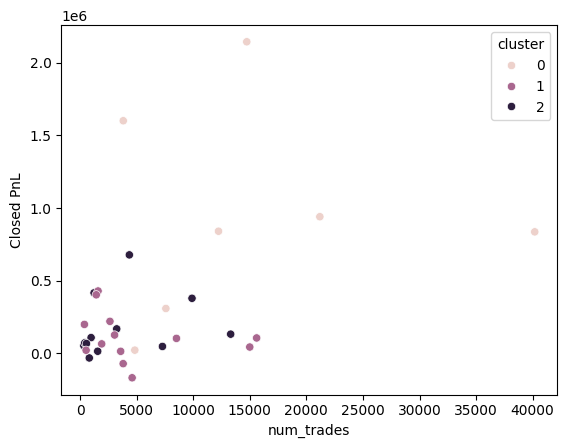

In [36]:
# Visualize clusters

import seaborn as sns

sns.scatterplot(
    data=trader_features,
    x='num_trades',
    y='Closed PnL',
    hue='cluster'
)

**Clustering groups traders into behavioural archetypes such as: High activity / low profit, Low activity / consistent profit, High activity / high risk traders**

## A lightweight dashboard (Streamlit) to explore results 

In [38]:
# for dashboard

df.to_csv("merged_dataset.csv", index=False)